<a href="https://colab.research.google.com/github/renya1993/Learning/blob/main/perseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純パーセプトロンの実装

単純パーセプトロンの実装をします。
単純パーセプトロンとは、**入力が複数、出力は1or0**で表されるモデルの事です。



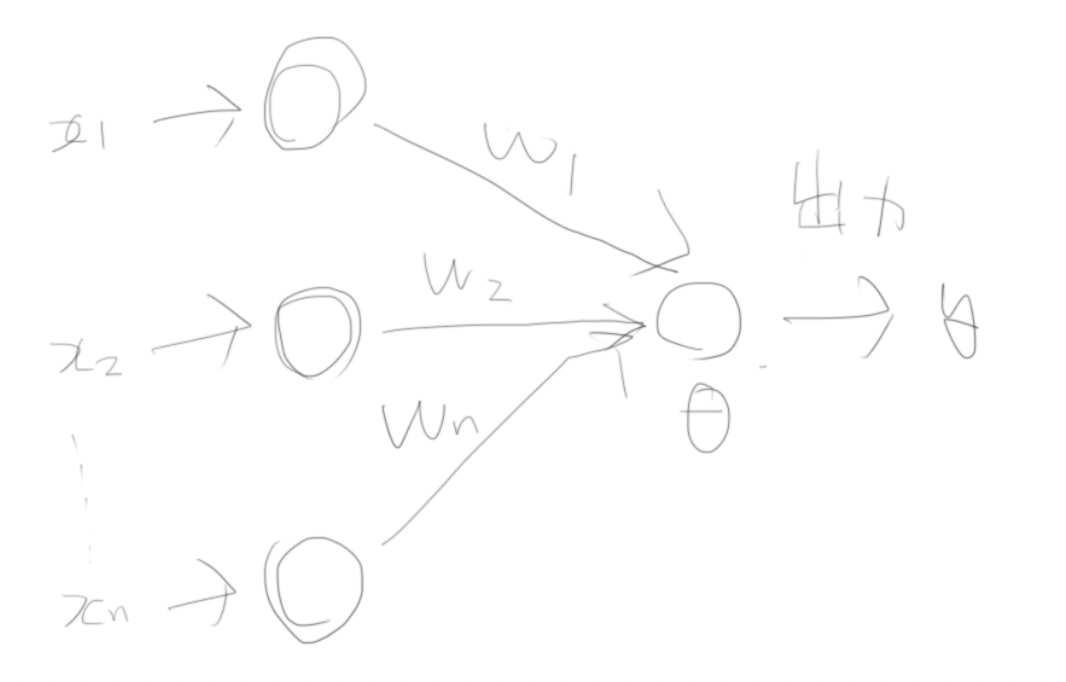

**単純パーセプロンを表現する式**

$\ w_1x_{1}+w_1x_{1}+ w_2x_{2}+w_2x_{2}+...+w_nx_{n}+w_nx_{n}\leq Θ	\ $

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
"""
データの準備
"""

import numpy as np
d = 2 #次元数
N = 20 #行の数
mean = 5 #ただの変数

#データ
x1 = np.random.randn(N//2,d)
x2 = np.random.randn(N//2,d)+np.array([mean,mean])
t1 = np.zeros(N//2)
t2 = np.ones(N//2)
x = np.concatenate((x1,x2),axis=0) #学習データ
t = np.concatenate((t1,t2),axis=0) #教師データ

print("x.shape:",x.shape)
print("t.shape:",t.shape)

x.shape: (20, 2)
t.shape: (20,)


In [91]:
  """
  実際に学習
  """

  model = SimplePerceptron(input_dim=d)
  while True:
    #学習できてるかどうかに仕様
    classified = True
    
    for i in range(N):
      #学習データの計算結果と、教師データから分かる計算をする
      loss = train_step(x[i],t[i])
      #N回全部loss=Trueであれば、もう学習の必要ないため、終わらせる。
      classified *= loss
    if classified:
      break
  np.random.seed(123)
  print('w:', model.w)  # => w: [1.660725   1.49465147]
  print('b:', model.b)  # => b: -10.0

w: [1.47078121 1.4284199 ]
b: -9.0


In [77]:
  """
  学習の補足分
  """
  
  def train_step(x,t):
    dw,db = model.compute_deltas(x,t)
    #dw,db共に、0の場合だけ、trueが返される
    loss = all(dw==0)*(db==0)
    model.w = model.w-dw
    model.b = model.b-db
    return loss

In [81]:
class SimplePerceptron(object):
  """
  単純パーセプトロン
  """
  #1,データの準備
  def __init__(self,input_dim):
    self.input_dim = input_dim
    self.w = np.random.normal(size = (input_dim,))
    self.b = 0

  #2,モデルの構築
  def forward(self,x):
    y = step(np.matmul(self.w,x) + self.b)
    return y

  #3,モデルの学習
  def compute_deltas(self,x,t):
    y=self.forward(x)
    delta = y-t
    dw = delta*x
    db = delta
    return dw,db

def step(x):
  return 1*(x>0)   

In [2]:
import numpy as np
x =np.array([2,1,2])
x

y =np.array([[3,1,3],[1,2,4]])
y

array([[3, 1, 3],
       [1, 2, 4]])

In [106]:
np.matmul(y,x)

array([13, 12])

In [107]:
y*x

array([[6, 1, 6],
       [2, 2, 8]])

In [85]:
#データの準備

x = np.array([[0,0],[0,1],[1,0],[1,1]])
t = np.array([0,1,1,1])



In [96]:
## ロジスティック回帰

class LogosticRegression(object):
  def __init__(self,input_dim):
    self.input_dim = input_dim
    self.w = np.random.normal(size=(input_dim,))
    self.b = 0

  def __call__(self,x): #これは、model(x)とした時そのまま回答が出るようにする便利なやつ
    return self.forward(x)

  def forward(self,x):
    return sigmoid(np.matmul(x,self.w)+self.b)

  def compute_gradient(self,x,t):
    y = self.forward(x)
    delta = y-t
    dw = np.matmul(x.T,delta)
    db = np.matmul(np.ones(x.shape[0]),delta)
    return dw,db

def sigmoid(x):
  return 1/(1+np.exp(-x))


In [97]:
model = LogosticRegression(input_dim=2)

In [99]:

#交差エントロピー誤差関数
#これの最小値を求めていくのが今回の課題。
def compute_loss(t,y):
  rw = -1*(t*np.log(y)+(1-t)*np.log(1-y)).sum() 
  return rw
def train_step(x,y):
  dw,db = model.compute_gradient(x,t)
  model.w = model.w-0.1*dw
  model.b = model.b-0.1*db
  loss = compute_loss(t,model(x))
  return loss

epochs = 100

for epoch in range(epochs):
  train_loss = train_step(x,t)

  if epoch % 10 == 0 or epoch== epochs-1:
    print(epoch+1,train_loss)

1 0.6766615374009524
11 0.6375977637852859
21 0.6025334250596772
31 0.5708993158219461
41 0.5422282506508158
51 0.5161333380460635
61 0.492291522844539
71 0.4704309930147411
81 0.45032144476032165
91 0.43176648194832823
100 0.41625644070659984


In [102]:
model.forward(x)


array([0.2146671 , 0.91627751, 0.9185485 , 0.99779015])

In [101]:
t

array([0, 1, 1, 1])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

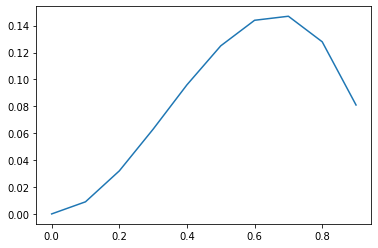

In [28]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,1,0.1)

plt.plot(x,x*x*(1-x))
x